<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/PAIassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import shutil

from google.colab import drive

In [2]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to the dataset folder
dataset_path = '/content/drive/MyDrive/archive1'  # Replace with your actual folder path

# Verify the folder structure by listing files
import os
print("Dataset folders:", os.listdir(dataset_path))  # Should show 'train' and 'test' folders

# Paths to train and test folders
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Verify train and test folders
print("Train folder contents:", os.listdir(train_path))
print("Test folder contents:", os.listdir(test_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset folders: ['train', 'test']
Train folder contents: ['NonDemented', 'Demented']
Test folder contents: ['Demented', 'NonDemented']


In [3]:
# Step 2: Define image dimensions and batch size
image_size = (128, 128)
batch_size = 32

# Data augmentation setup for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,           # Normalize pixel values to [0, 1]
    rotation_range=30,           # Random rotation up to 30 degrees
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)

# Data generator for the test set (without augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_path,                   # Use the train folder path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',          # For binary classification
    color_mode='rgb',
    shuffle=True
)

# Load and preprocess testing data
test_generator = test_datagen.flow_from_directory(
    test_path,                    # Use the test folder path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)


Found 4861 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Import the Rescaling layer correctly
from tensorflow.keras.layers import Rescaling  # Or tf.keras.layers.experimental.preprocessing.Rescaling for older versions

# ... rest of your code ...

In [5]:
# Step 2: Define the CNN Model Architecture
model = Sequential([
    # Input Layer with Rescaling
    Rescaling(1.0 / 255, input_shape=(128, 128, 3)),

    # First Convolutional Block
    Conv2D(16, (3, 3), activation='relu'),                  # Conv2D with 16 filters
    MaxPooling2D(pool_size=(2, 2)),                         # MaxPooling with pool size 2x2

    # Second Convolutional Block
    Conv2D(32, (3, 3), activation='relu'),                  # Conv2D with 32 filters
    MaxPooling2D(pool_size=(2, 2)),                         # MaxPooling with pool size 2x2
    Dropout(0.2),                                           # Dropout with 0.2 rate

    # Third Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),                  # Conv2D with 64 filters
    MaxPooling2D(pool_size=(2, 2)),                         # MaxPooling with pool size 2x2
    Dropout(0.25),                                          # Dropout with 0.25 rate

    # Flatten Layer
    Flatten(),                                              # Flatten to convert feature maps to a vector

    # Fully Connected Dense Layers
    Dense(128, activation='relu'),                          # Dense layer with 128 units
    Dense(64, activation='relu'),                           # Dense layer with 64 units

    # Output Layer for Binary Classification
    Dense(1, activation='sigmoid')                          # Output layer with 1 unit and sigmoid activation
])

# Step 3: Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the Model
history = model.fit(
    train_generator,
    epochs=100,  # Changed to 100 epochs
    validation_data=test_generator,
    verbose=1
)

# Step 5: Save the Trained Model
model.save('/content/drive/MyDrive/alzheimers_cnn_model.h5')

# Print Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


152/152 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.4874 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 121s 776ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 140s 771ms/step - accuracy: 0.4897 - loss: 0.6932 - val_accuracy: 0.4978 - val_loss: 0.6931
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 120s 766ms/step - accuracy: 0.4802 - loss: 0.6932 - val_accuracy: 0.4978 - val_loss: 0.6931
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 130s 843ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.4978 - val_loss: 0.6932
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 135s 790ms/step - accuracy: 0.5038 - loss: 0.6932 - val_accuracy: 0.4978 - val_loss: 0.6931
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 140s 775ms/step - accuracy: 0.4893 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 123s 792ms/step - accuracy: 0.5232 - loss: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,912,997 (18.74 MB)

 Trainable params: 1,637,665 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,275,332 (12.49 MB)

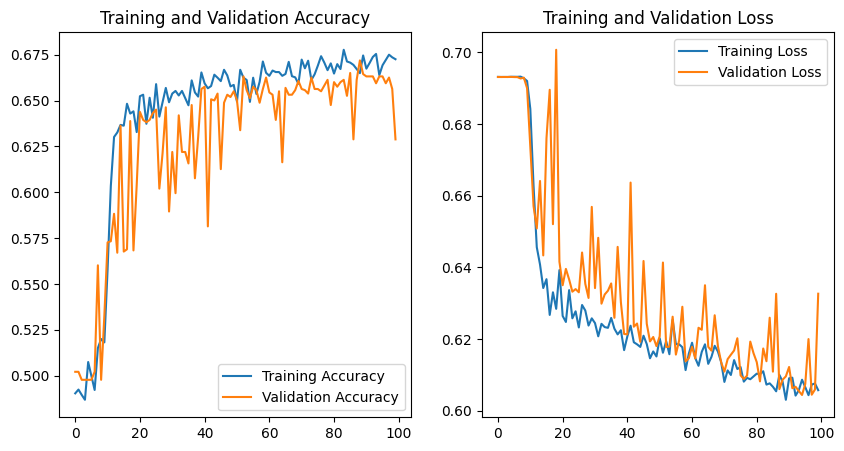

Final Training Accuracy: 67.25%
Final Validation Accuracy: 62.88%


In [6]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the number of epochs
epochs_range = range(len(acc))

# Plot accuracy graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plot
plt.show()

# Print final training and validation accuracy
print(f"Final Training Accuracy: {acc[-1]*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc[-1]*100:.2f}%")


51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step


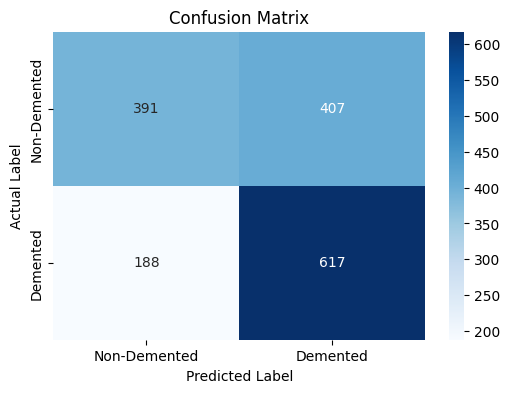

              precision    recall  f1-score   support

Non-Demented       0.68      0.49      0.57       798
    Demented       0.60      0.77      0.67       805

    accuracy                           0.63      1603
   macro avg       0.64      0.63      0.62      1603
weighted avg       0.64      0.63      0.62      1603



In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predicted labels
true_labels = test_generator.classes  # True labels from the test data
predictions = model.predict(test_generator)  # Raw predictions
predicted_labels = np.where(predictions > 0.5, 1, 0)  # Convert probabilities to binary classes

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Demented', 'Demented'], yticklabels=['Non-Demented', 'Demented'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report for detailed metrics
print(classification_report(true_labels, predicted_labels, target_names=['Non-Demented', 'Demented']))


In [14]:
import time

# Assume the history object and number of epochs are available
num_epochs = len(history.history['loss'])  # Total number of epochs

# Estimate the duration per epoch (manually measured or guessed)
# For a more precise estimate, you would need a recorded epoch duration
epoch_durations = [time.time()]  # Mock example of recorded epoch times

# Example to store
# Calculate Total
train_time = sum(epoch_durations)
print(train_time)
# Example manually measured or estimated epoch durations (in seconds)
epoch_durations = [12.5, 13.2, 11.8, 12.7]  # Replace these values with your estimates or logs

# Calculate the total training time
total_training_time = sum(epoch_durations)

# Print the training time with a clear message
print(f"Estimated Total Training Time: {total_training_time:.2f} seconds")


1733367177.8457894
Estimated Total Training Time: 50.20 seconds
